<a href="https://colab.research.google.com/github/ehcp10/projeto-interdisciplinar/blob/main/projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto interdisciplinar 
##Integrantes
####Evandro Henrique Couto de Paula
####Leticia Freitas
####Jessé Oliveira

# Motivação
### Contextualização
Durante o ano de 2020 o mundo passou a enfrentar a maior pandemia virológica dos últimos 100 anos os números de infectados e mortos pela doença cresceram durante o ano, o Brasil também foi um dos países afetados além dos inúmeros impactos humanos existiram deversos impactos sociais. 

Nesse contexto o grupo buscou analisar o impacto da pandemia na população com analisando o principal programa social do país o **Bolsa Família**.

### Dados analisados
As bases dados analisadas são as bases de dados abertos do governo, os dados do covid provém do Data SUS enquanto os dados do bolsa família são provenientes do ministério da cidadania



# Importando bibliotecas

In [1]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

# Carregando dados



In [2]:
# Montando drive 
from google.colab import drive
drive.mount('/content/drive')

# Carregando dados do bolsa família
beneficios_2019 = pd.read_csv('/content/drive/MyDrive/datasets-projeto/quantidadeDeFamiliasBeneficiarias2019.csv', sep=',')
beneficios_2020 = pd.read_csv('/content/drive/MyDrive/datasets-projeto/quantidadeDeFamiliasBeneficiarias2020.csv', sep=',')

# Carregando dados do covid
#carregando dados do covid
dados_covid_pt1 = pd.read_csv('/content/drive/MyDrive/datasets-projeto/HIST_PAINEL_COVIDBR_2020_Parte1_28jun2021.csv', sep=';')
dados_covid_pt2 = pd.read_csv('/content/drive/MyDrive/datasets-projeto/HIST_PAINEL_COVIDBR_2020_Parte2_28jun2021.csv', sep=';')
dados_covid_pt3 = pd.read_csv('/content/drive/MyDrive/datasets-projeto/HIST_PAINEL_COVIDBR_Parte3_28jun2021.csv', sep=';')

Mounted at /content/drive


# Limpeza e tratamento dos dados

## Limpeza e tratamento dos dados do bolsa famíla





### Entendendo os dados

In [3]:
estados = beneficios_2019['siglauf'].unique()


### Normalizando as datas:


In [4]:
beneficios_2019['anomes'] = pd.to_datetime(beneficios_2019['anomes'], format='%Y%m' )
beneficios_2020['anomes'] = pd.to_datetime(beneficios_2020['anomes'], format='%Y%m' )
beneficios_2019

,ibge,siglauf,anomes,qtd_ben_bas,qtd_ben_var,qtd_ben_bvj,qtd_ben_bvn,qtd_ben_bvg,qtd_ben_bsp
0,110001,RO,2019-01-01,1181.0,2381,233.0,41.0,14.0,209.0
1,110001,RO,2019-02-01,1155.0,2333,244.0,39.0,36.0,209.0
2,110001,RO,2019-03-01,1157.0,2350,249.0,39.0,49.0,208.0
3,110001,RO,2019-04-01,1170.0,2376,254.0,42.0,48.0,206.0
4,110001,RO,2019-05-01,1167.0,2389,264.0,49.0,65.0,221.0
...,...,...,...,...,...,...,...,...,...
66835,530010,DF,2019-08-01,60660.0,110616,14546.0,1581.0,2496.0,25989.0
66836,530010,DF,2019-09-01,59010.0,106777,14435.0,1512.0,2804.0,25649.0
66837,530010,DF,2019-10-01,59462.0,107349,14946.0,1453.0,2888.0,25909.0
66838,530010,DF,2019-11-01,57052.0,102458,14281.0,1355.0,2840.0,25268.0


### Agregando os dados


In [5]:
beneficios = beneficios_2019.append(beneficios_2020)

### Renomeando as colunas

In [6]:
colunas = ['codigo_ibge', 'sigla_estado', 'data_referencia','beneficios_basicos', 'beneficios_variaveis', 'beneficios_jovem', 'beneficios_nutriz', 'beneficios_gestantes', 'beneficios_superacao_de_pobreza']
beneficios.columns = colunas

### Tratando os campos nulos e formato dos dados

In [7]:
# Estamos identificando os tips dos dados, para compreender quais tipos das colunas(atributos)
beneficios_normalizado = beneficios.replace(np.nan,0)
beneficios_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133680 entries, 0 to 66839
Data columns (total 9 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   codigo_ibge                      133680 non-null  int64         
 1   sigla_estado                     133680 non-null  object        
 2   data_referencia                  133680 non-null  datetime64[ns]
 3   beneficios_basicos               133680 non-null  float64       
 4   beneficios_variaveis             133680 non-null  int64         
 5   beneficios_jovem                 133680 non-null  float64       
 6   beneficios_nutriz                133680 non-null  float64       
 7   beneficios_gestantes             133680 non-null  float64       
 8   beneficios_superacao_de_pobreza  133680 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 10.2+ MB


### Tranformando os tipos contínuos para concretos para normalização

In [8]:
beneficios_normalizado[['beneficios_basicos', 'beneficios_variaveis', 'beneficios_jovem', 'beneficios_nutriz', 'beneficios_gestantes', 'beneficios_superacao_de_pobreza']] = beneficios_normalizado[['beneficios_basicos', 'beneficios_variaveis', 'beneficios_jovem', 'beneficios_nutriz', 'beneficios_gestantes', 'beneficios_superacao_de_pobreza']].astype(int)

### Remoção de coluna do IBGE que não será utilizada na análise

In [9]:
beneficios_normalizado.drop(columns=['codigo_ibge'], inplace=True)

### Adicionando a coluna de soma de total de benefícios



In [10]:
beneficios_normalizado['total_de_beneficios'] = beneficios_normalizado[['beneficios_basicos', 'beneficios_variaveis', 'beneficios_jovem', 'beneficios_nutriz', 'beneficios_gestantes', 'beneficios_superacao_de_pobreza']].sum(axis = 1)

beneficios_estado_data = beneficios_normalizado.groupby(by=['sigla_estado', 'data_referencia']).sum().reset_index()
beneficios_estado_data

,sigla_estado,data_referencia,beneficios_basicos,beneficios_variaveis,beneficios_jovem,beneficios_nutriz,beneficios_gestantes,beneficios_superacao_de_pobreza,total_de_beneficios
0,AC,2019-01-01,82141,162299,19257,3630,4619,57184,329130
1,AC,2019-02-01,83065,162990,20064,3777,4274,57735,331905
2,AC,2019-03-01,83964,163931,20910,3751,4093,58618,335267
3,AC,2019-04-01,84259,163902,21719,3565,3587,57566,334598
4,AC,2019-05-01,85481,164493,22492,3542,4432,59567,340007
...,...,...,...,...,...,...,...,...,...
643,TO,2020-08-01,108794,182487,23090,1537,2994,44720,363622
644,TO,2020-09-01,108912,178915,26493,1307,4468,44294,364389
645,TO,2020-10-01,108997,178985,26492,612,3827,44391,363304
646,TO,2020-11-01,109087,179011,26497,464,3355,44442,362856


## Limpeza e tratamento dos dados do COVID


### Unindo dados do covid no brasil, em um único data-frame

In [11]:
#unindo dados do covid no brasil, em um único data-frame
dados_covid = pd.concat([dados_covid_pt1, dados_covid_pt2, dados_covid_pt3])

### Convertendo dados em datas

In [12]:
dados_covid['data'] = pd.to_datetime(dados_covid['data'], format='%Y-%m-%d' )

### Indentificando as regiões

In [13]:
print(f"As regiões presentes são {dados_covid['regiao'].unique()}")


As regiões presentes são ['Brasil' 'Norte' 'Nordeste' 'Sudeste' 'Sul' 'Centro-Oeste']


### Agregando dados por Brasil

In [14]:
dados_covid_brasil = dados_covid[dados_covid['regiao'].str.contains('Brasil')]
dados_covid_brasil

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9.0,210147125.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9.0,210147125.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9.0,210147125.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9.0,210147125.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9.0,210147125.0,2.0,1.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-06-24,25.0,210147125.0,18243483.0,73602.0,509141.0,2032.0,16511701.0,1222641.0,NaN
176,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-06-25,25.0,210147125.0,18322760.0,79277.0,511142.0,2001.0,16548159.0,1263459.0,NaN
177,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-06-26,25.0,210147125.0,18386894.0,64134.0,512735.0,1593.0,16582053.0,1292106.0,NaN
178,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-06-27,26.0,210147125.0,18420598.0,33704.0,513474.0,739.0,16613992.0,1293132.0,NaN


### Agregando por região

In [15]:
dados_covid_brasil = dados_covid[dados_covid['regiao'].str.contains('Brasil')]
dados_covid_sul = dados_covid[dados_covid['regiao'].str.contains('Sul')].reset_index()
dados_covid_sudeste = dados_covid[dados_covid['regiao'].str.contains('Sudeste')].reset_index()
dados_covid_cento_oeste = dados_covid[dados_covid['regiao'].str.contains('Centro-Oeste')].reset_index()
dados_covid_norte = dados_covid[dados_covid['regiao'].str.contains('Norte')].reset_index()
dados_covid_nordeste = dados_covid[dados_covid['regiao'].str.contains('Nordeste')].reset_index()


# Explorando dados do bolsa famíla

### Entendendo as métricas do dataframe por agregado por estado


In [16]:
beneficios_normalizado.groupby('sigla_estado').describe().T

sigla_estado                                     AC  ...            TO
beneficios_basicos              count    528.000000  ...   3336.000000
                                mean    3828.765152  ...    719.750000
                                std     4492.702186  ...    971.694784
                                min     1096.000000  ...     82.000000
                                25%     1385.000000  ...    279.000000
                                50%     2182.000000  ...    501.000000
                                75%     4176.250000  ...    835.250000
                                max    23889.000000  ...  11133.000000
beneficios_variaveis            count    528.000000  ...   3336.000000
                                mean    7268.954545  ...   1301.787170
                                std     8645.924313  ...   2216.076474
                                min     2288.000000  ...    105.000000
                                25%     2857.250000  ...    430.000000
                                50%     3873.500000  ...    772.000000
                                75%     5807.250000  ...   1263.750000
                                max    42976.000000  ...  22569.000000
beneficios_jovem                count    528.000000  ...   3336.000000
                                mean    1026.464015  ...    171.003297
                                std     1226.569229  ...    245.933497
                                min      207.000000  ...     11.000000
                                25%      378.750000  ...     60.000000
                                50%      567.500000  ...    109.000000
                                75%      898.000000  ...    188.000000
                                max     6492.000000  ...   2409.000000
beneficios_nutriz               count    528.000000  ...   3336.000000
                                mean     116.695076  ...     19.993405
                                std      143.215221  ...     38.616485
                                min        0.000000  ...      0.000000
                                25%       40.000000  ...      6.000000
                                50%       69.000000  ...     12.000000
                                75%      118.500000  ...     22.000000
                                max      853.000000  ...    562.000000
beneficios_gestantes            count    528.000000  ...   3336.000000
                                mean     190.850379  ...     34.951739
                                std      218.386759  ...     60.821141
                                min       20.000000  ...      0.000000
                                25%       74.750000  ...     12.000000
                                50%      114.500000  ...     21.000000
                                75%      181.000000  ...     37.000000
                                max     1203.000000  ...    769.000000
beneficios_superacao_de_pobreza count    528.000000  ...   3336.000000
                                mean    2700.695076  ...    308.639089
                                std     3024.315497  ...    376.322534
                                min      301.000000  ...     14.000000
                                25%      772.500000  ...    107.000000
                                50%     1307.500000  ...    207.000000
                                75%     3634.250000  ...    373.000000
                                max    14034.000000  ...   3901.000000
total_de_beneficios             count    528.000000  ...   3336.000000
                                mean   15132.424242  ...   2556.124700
                                std    17602.907224  ...   3768.906904
                                min     4502.000000  ...    253.000000
                                25%     5737.500000  ...    952.000000
                                50%     8044.500000  ...   1625.000000
                                75%    14679.500000  ...   2763.500000
                        

### Separando os estados do dataframe em regiões

In [17]:
norte = ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO']
nordeste = ['MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA']
sudeste = ['SP', 'RJ', 'MG', 'ES']
centro_oeste = ['DF', 'GO', 'MT', 'MS']
sul = ['PR', 'SC', 'RS']

### Separando A bese por Região

#### **Qual o total de benefícios por estados?** 

In [18]:
beneficios_normalizado_norte = beneficios_normalizado[beneficios_normalizado['sigla_estado'].isin(norte)]
beneficios_normalizado_nordeste = beneficios_normalizado[beneficios_normalizado['sigla_estado'].isin(nordeste)]
beneficios_normalizado_sudeste = beneficios_normalizado[beneficios_normalizado['sigla_estado'].isin(sudeste)]
beneficios_normalizado_centro_oeste = beneficios_normalizado[beneficios_normalizado['sigla_estado'].isin(centro_oeste)]
beneficios_normalizado_sul = beneficios_normalizado[beneficios_normalizado['sigla_estado'].isin(sul)]

##### **Benefícios básicos**

[Text(0, 0.5, 'Benefícios basícos'), Text(0.5, 0, 'Estado')]

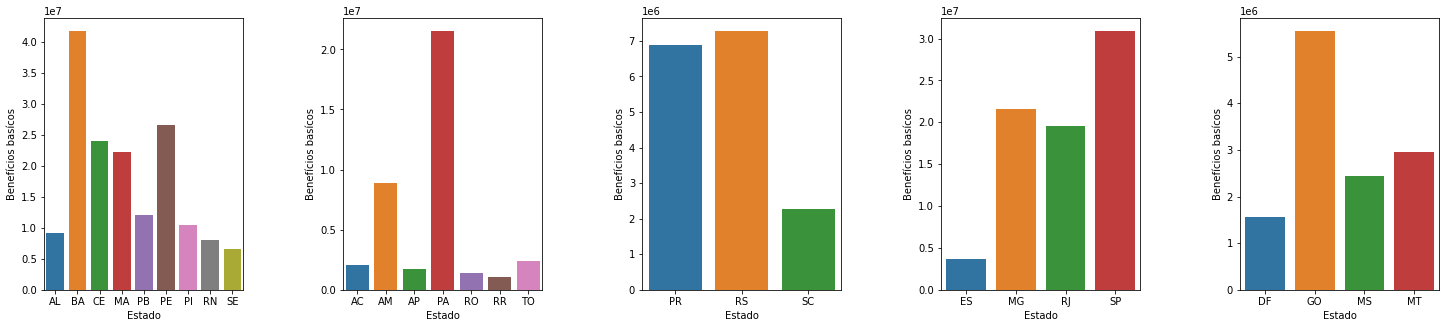

In [19]:
fig, ax = plt.subplots(figsize = (25,5), ncols=5)   
plt.subplots_adjust(hspace = 0.2, wspace=0.5)

contagem_beneficios_basicos_ne = beneficios_normalizado_nordeste.groupby(by='sigla_estado')['beneficios_basicos'].sum().reset_index()
contagem_beneficios_basicos_no = beneficios_normalizado_norte.groupby(by='sigla_estado')['beneficios_basicos'].sum().reset_index()
contagem_beneficios_basicos_s = beneficios_normalizado_sul.groupby(by='sigla_estado')['beneficios_basicos'].sum().reset_index()
contagem_beneficios_basicos_se = beneficios_normalizado_sudeste.groupby(by='sigla_estado')['beneficios_basicos'].sum().reset_index()
contagem_beneficios_basicos_co = beneficios_normalizado_centro_oeste.groupby(by='sigla_estado')['beneficios_basicos'].sum().reset_index()
contagem_beneficios_basicos_co

bar_ne = sns.barplot(data=contagem_beneficios_basicos_ne, x=contagem_beneficios_basicos_ne['sigla_estado'], y=contagem_beneficios_basicos_ne['beneficios_basicos'], ax=ax[0])
bar_no = sns.barplot(data=contagem_beneficios_basicos_no, x=contagem_beneficios_basicos_no['sigla_estado'], y=contagem_beneficios_basicos_no['beneficios_basicos'], ax=ax[1])
bar_s = sns.barplot(data=contagem_beneficios_basicos_s, x=contagem_beneficios_basicos_s['sigla_estado'], y=contagem_beneficios_basicos_s['beneficios_basicos'], ax=ax[2])
bar_se = sns.barplot(data=contagem_beneficios_basicos_se, x=contagem_beneficios_basicos_se['sigla_estado'], y=contagem_beneficios_basicos_se['beneficios_basicos'], ax=ax[3])
bar_co = sns.barplot(data=contagem_beneficios_basicos_co, x=contagem_beneficios_basicos_co['sigla_estado'], y=contagem_beneficios_basicos_co['beneficios_basicos'], ax=ax[4])

ax[0].set(ylabel="Benefícios basícos", xlabel="Estado")
ax[1].set(ylabel="Benefícios basícos", xlabel="Estado")
ax[2].set(ylabel="Benefícios basícos", xlabel="Estado")
ax[3].set(ylabel="Benefícios basícos", xlabel="Estado")
ax[4].set(ylabel="Benefícios basícos", xlabel="Estado")

##### **Benefícios variáveis**

[Text(0, 0.5, 'Benefícios variáveis'), Text(0.5, 0, 'Estado')]

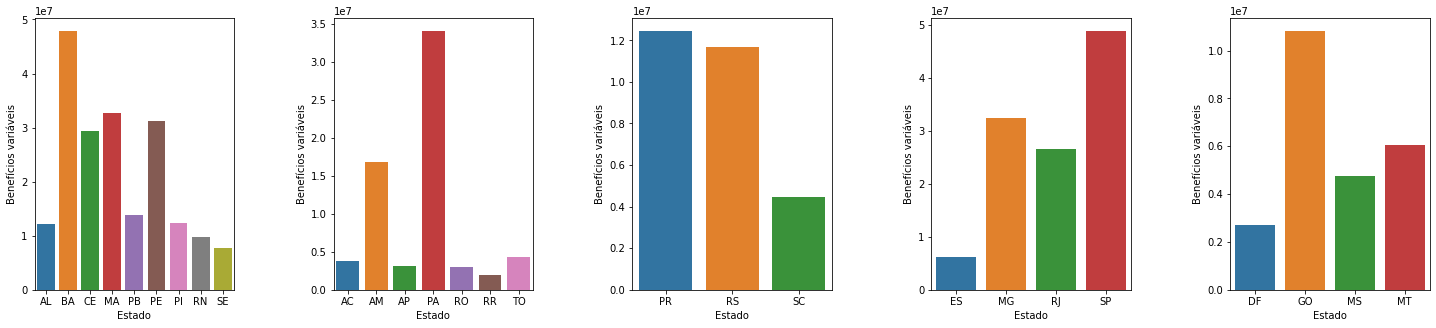

In [20]:
fig, ax = plt.subplots(figsize = (25,5), ncols=5)   
plt.subplots_adjust(hspace = 0.2, wspace=0.5)

contagem_beneficios_variaveis_ne = beneficios_normalizado_nordeste.groupby(by='sigla_estado')['beneficios_variaveis'].sum().reset_index()
contagem_beneficios_variaveis_no = beneficios_normalizado_norte.groupby(by='sigla_estado')['beneficios_variaveis'].sum().reset_index()
contagem_beneficios_variaveis_s = beneficios_normalizado_sul.groupby(by='sigla_estado')['beneficios_variaveis'].sum().reset_index()
contagem_beneficios_variaveis_se = beneficios_normalizado_sudeste.groupby(by='sigla_estado')['beneficios_variaveis'].sum().reset_index()
contagem_beneficios_variaveis_co = beneficios_normalizado_centro_oeste.groupby(by='sigla_estado')['beneficios_variaveis'].sum().reset_index()

bar_ne = sns.barplot(data=contagem_beneficios_variaveis_ne, x=contagem_beneficios_variaveis_ne['sigla_estado'], y=contagem_beneficios_variaveis_ne['beneficios_variaveis'], ax=ax[0])
bar_no = sns.barplot(data=contagem_beneficios_variaveis_no, x=contagem_beneficios_variaveis_no['sigla_estado'], y=contagem_beneficios_variaveis_no['beneficios_variaveis'], ax=ax[1])
bar_s = sns.barplot(data=contagem_beneficios_variaveis_s, x=contagem_beneficios_variaveis_s['sigla_estado'], y=contagem_beneficios_variaveis_s['beneficios_variaveis'], ax=ax[2])
bar_se = sns.barplot(data=contagem_beneficios_variaveis_se, x=contagem_beneficios_variaveis_se['sigla_estado'], y=contagem_beneficios_variaveis_se['beneficios_variaveis'], ax=ax[3])
bar_co = sns.barplot(data=contagem_beneficios_variaveis_co, x=contagem_beneficios_variaveis_co['sigla_estado'], y=contagem_beneficios_variaveis_co['beneficios_variaveis'], ax=ax[4])

ax[0].set(ylabel="Benefícios variáveis", xlabel="Estado")
ax[1].set(ylabel="Benefícios variáveis", xlabel="Estado")
ax[2].set(ylabel="Benefícios variáveis", xlabel="Estado")
ax[3].set(ylabel="Benefícios variáveis", xlabel="Estado")
ax[4].set(ylabel="Benefícios variáveis", xlabel="Estado")

##### **Benefícios jovem**

[Text(0, 0.5, 'Benefícios jovem'), Text(0.5, 0, 'Estado')]

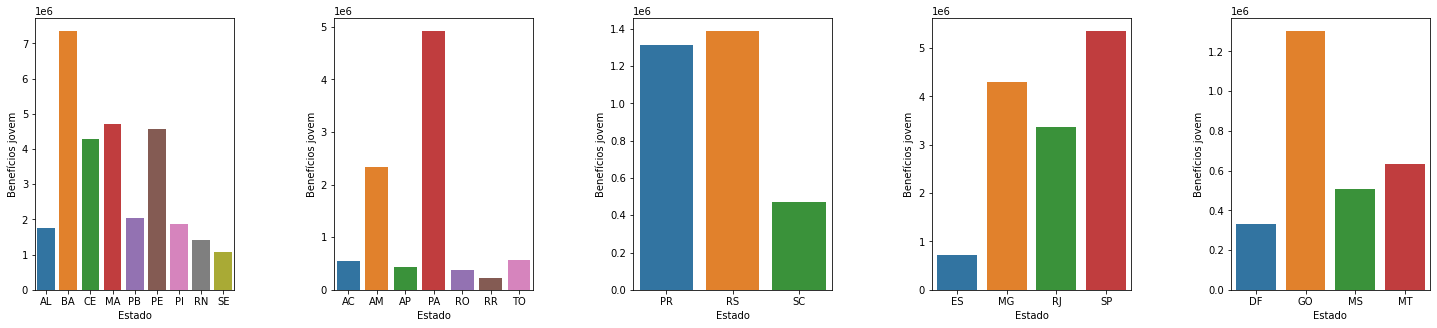

In [21]:
fig, ax = plt.subplots(figsize = (25,5), ncols=5)   
plt.subplots_adjust(hspace = 0.2, wspace=0.5)

contagem_beneficios_jovem_ne = beneficios_normalizado_nordeste.groupby(by='sigla_estado')['beneficios_jovem'].sum().reset_index()
contagem_beneficios_jovem_no = beneficios_normalizado_norte.groupby(by='sigla_estado')['beneficios_jovem'].sum().reset_index()
contagem_beneficios_jovem_s = beneficios_normalizado_sul.groupby(by='sigla_estado')['beneficios_jovem'].sum().reset_index()
contagem_beneficios_jovem_se = beneficios_normalizado_sudeste.groupby(by='sigla_estado')['beneficios_jovem'].sum().reset_index()
contagem_beneficios_jovem_co = beneficios_normalizado_centro_oeste.groupby(by='sigla_estado')['beneficios_jovem'].sum().reset_index()

bar_ne = sns.barplot(data=contagem_beneficios_jovem_ne, x=contagem_beneficios_jovem_ne['sigla_estado'], y=contagem_beneficios_jovem_ne['beneficios_jovem'], ax=ax[0])
bar_no = sns.barplot(data=contagem_beneficios_jovem_no, x=contagem_beneficios_jovem_no['sigla_estado'], y=contagem_beneficios_jovem_no['beneficios_jovem'], ax=ax[1])
bar_s = sns.barplot(data=contagem_beneficios_jovem_s, x=contagem_beneficios_jovem_s['sigla_estado'], y=contagem_beneficios_jovem_s['beneficios_jovem'], ax=ax[2])
bar_se = sns.barplot(data=contagem_beneficios_jovem_se, x=contagem_beneficios_jovem_se['sigla_estado'], y=contagem_beneficios_jovem_se['beneficios_jovem'], ax=ax[3])
bar_co = sns.barplot(data=contagem_beneficios_jovem_co, x=contagem_beneficios_jovem_co['sigla_estado'], y=contagem_beneficios_jovem_co['beneficios_jovem'], ax=ax[4])

ax[0].set(ylabel="Benefícios jovem", xlabel="Estado")
ax[1].set(ylabel="Benefícios jovem", xlabel="Estado")
ax[2].set(ylabel="Benefícios jovem", xlabel="Estado")
ax[3].set(ylabel="Benefícios jovem", xlabel="Estado")
ax[4].set(ylabel="Benefícios jovem", xlabel="Estado")

##### **Benefícios nutriz**

[Text(0, 0.5, 'Benefícios nutriz'), Text(0.5, 0, 'Estado')]

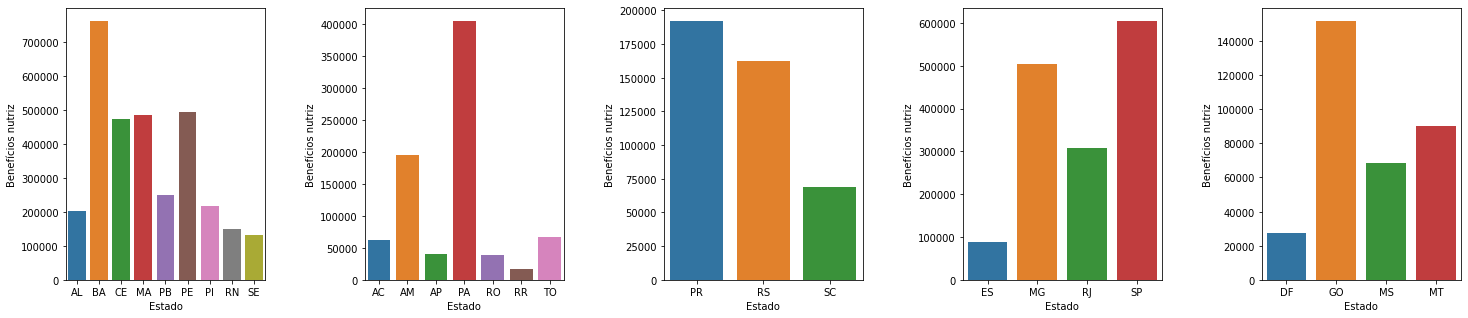

In [22]:
fig, ax = plt.subplots(figsize = (25,5), ncols=5)   
plt.subplots_adjust(hspace = 0.2, wspace=0.5)

contagem_beneficios_nutriz_ne = beneficios_normalizado_nordeste.groupby(by='sigla_estado')['beneficios_nutriz'].sum().reset_index()
contagem_beneficios_nutriz_no = beneficios_normalizado_norte.groupby(by='sigla_estado')['beneficios_nutriz'].sum().reset_index()
contagem_beneficios_nutriz_s = beneficios_normalizado_sul.groupby(by='sigla_estado')['beneficios_nutriz'].sum().reset_index()
contagem_beneficios_nutriz_se = beneficios_normalizado_sudeste.groupby(by='sigla_estado')['beneficios_nutriz'].sum().reset_index()
contagem_beneficios_nutriz_co = beneficios_normalizado_centro_oeste.groupby(by='sigla_estado')['beneficios_nutriz'].sum().reset_index()

bar_ne = sns.barplot(data=contagem_beneficios_nutriz_ne, x=contagem_beneficios_nutriz_ne['sigla_estado'], y=contagem_beneficios_nutriz_ne['beneficios_nutriz'], ax=ax[0])
bar_no = sns.barplot(data=contagem_beneficios_nutriz_no, x=contagem_beneficios_nutriz_no['sigla_estado'], y=contagem_beneficios_nutriz_no['beneficios_nutriz'], ax=ax[1])
bar_s = sns.barplot(data=contagem_beneficios_nutriz_s, x=contagem_beneficios_nutriz_s['sigla_estado'], y=contagem_beneficios_nutriz_s['beneficios_nutriz'], ax=ax[2])
bar_se = sns.barplot(data=contagem_beneficios_nutriz_se, x=contagem_beneficios_nutriz_se['sigla_estado'], y=contagem_beneficios_nutriz_se['beneficios_nutriz'], ax=ax[3])
bar_co = sns.barplot(data=contagem_beneficios_nutriz_co, x=contagem_beneficios_nutriz_co['sigla_estado'], y=contagem_beneficios_nutriz_co['beneficios_nutriz'], ax=ax[4])

ax[0].set(ylabel="Benefícios nutriz", xlabel="Estado")
ax[1].set(ylabel="Benefícios nutriz", xlabel="Estado")
ax[2].set(ylabel="Benefícios nutriz", xlabel="Estado")
ax[3].set(ylabel="Benefícios nutriz", xlabel="Estado")
ax[4].set(ylabel="Benefícios nutriz", xlabel="Estado")

##### **Benefícios gestantes**

[Text(0, 0.5, 'Benefícios gestantes'), Text(0.5, 0, 'Estado')]

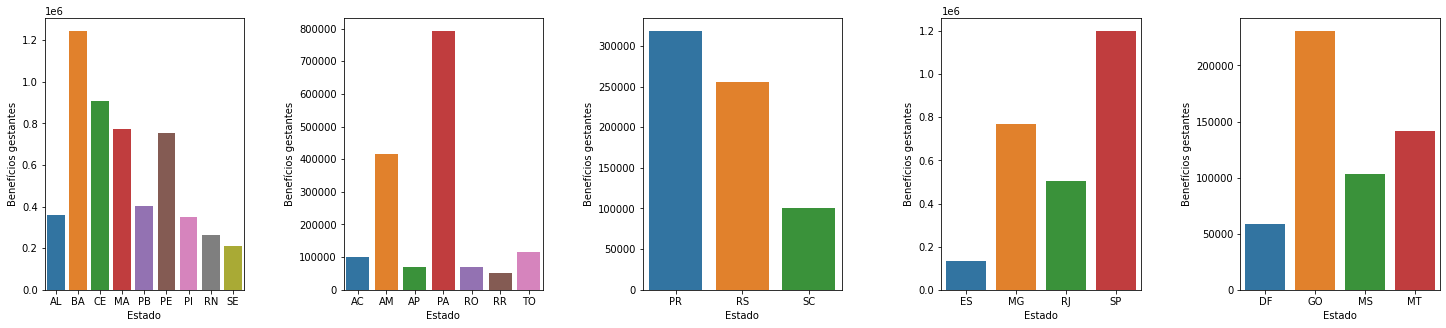

In [23]:
fig, ax = plt.subplots(figsize = (25,5), ncols=5)   
plt.subplots_adjust(hspace = 0.2, wspace=0.5)

contagem_beneficios_gestantes_ne = beneficios_normalizado_nordeste.groupby(by='sigla_estado')['beneficios_gestantes'].sum().reset_index()
contagem_beneficios_gestantes_no = beneficios_normalizado_norte.groupby(by='sigla_estado')['beneficios_gestantes'].sum().reset_index()
contagem_beneficios_gestantes_s = beneficios_normalizado_sul.groupby(by='sigla_estado')['beneficios_gestantes'].sum().reset_index()
contagem_beneficios_gestantes_se = beneficios_normalizado_sudeste.groupby(by='sigla_estado')['beneficios_gestantes'].sum().reset_index()
contagem_beneficios_gestantes_co = beneficios_normalizado_centro_oeste.groupby(by='sigla_estado')['beneficios_gestantes'].sum().reset_index()

bar_ne = sns.barplot(data=contagem_beneficios_gestantes_ne, x=contagem_beneficios_gestantes_ne['sigla_estado'], y=contagem_beneficios_gestantes_ne['beneficios_gestantes'], ax=ax[0])
bar_no = sns.barplot(data=contagem_beneficios_gestantes_no, x=contagem_beneficios_gestantes_no['sigla_estado'], y=contagem_beneficios_gestantes_no['beneficios_gestantes'], ax=ax[1])
bar_s = sns.barplot(data=contagem_beneficios_gestantes_s, x=contagem_beneficios_gestantes_s['sigla_estado'], y=contagem_beneficios_gestantes_s['beneficios_gestantes'], ax=ax[2])
bar_se = sns.barplot(data=contagem_beneficios_gestantes_se, x=contagem_beneficios_gestantes_se['sigla_estado'], y=contagem_beneficios_gestantes_se['beneficios_gestantes'], ax=ax[3])
bar_co = sns.barplot(data=contagem_beneficios_gestantes_co, x=contagem_beneficios_gestantes_co['sigla_estado'], y=contagem_beneficios_gestantes_co['beneficios_gestantes'], ax=ax[4])

ax[0].set(ylabel="Benefícios gestantes", xlabel="Estado")
ax[1].set(ylabel="Benefícios gestantes", xlabel="Estado")
ax[2].set(ylabel="Benefícios gestantes", xlabel="Estado")
ax[3].set(ylabel="Benefícios gestantes", xlabel="Estado")
ax[4].set(ylabel="Benefícios gestantes", xlabel="Estado")

##### **Benefícios superação de pobreza**

[Text(0, 0.5, 'Benefícios superação de pobreza'), Text(0.5, 0, 'Estado')]

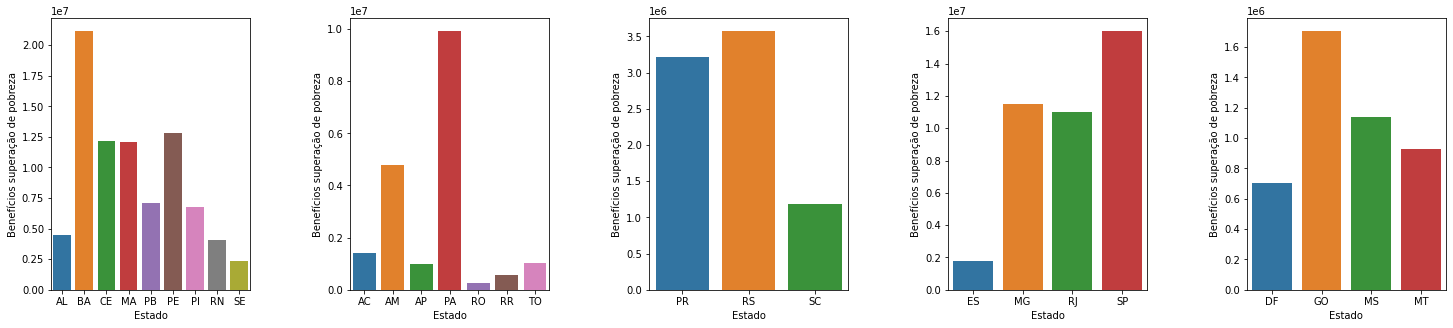

In [24]:
fig, ax = plt.subplots(figsize = (25,5), ncols=5)   
plt.subplots_adjust(hspace = 0.2, wspace=0.5)

contagem_beneficios_superacao_de_pobreza_ne = beneficios_normalizado_nordeste.groupby(by='sigla_estado')['beneficios_superacao_de_pobreza'].sum().reset_index()
contagem_beneficios_superacao_de_pobreza_no = beneficios_normalizado_norte.groupby(by='sigla_estado')['beneficios_superacao_de_pobreza'].sum().reset_index()
contagem_beneficios_superacao_de_pobreza_s = beneficios_normalizado_sul.groupby(by='sigla_estado')['beneficios_superacao_de_pobreza'].sum().reset_index()
contagem_beneficios_superacao_de_pobreza_se = beneficios_normalizado_sudeste.groupby(by='sigla_estado')['beneficios_superacao_de_pobreza'].sum().reset_index()
contagem_beneficios_superacao_de_pobreza_co = beneficios_normalizado_centro_oeste.groupby(by='sigla_estado')['beneficios_superacao_de_pobreza'].sum().reset_index()

bar_ne = sns.barplot(data=contagem_beneficios_superacao_de_pobreza_ne, x=contagem_beneficios_superacao_de_pobreza_ne['sigla_estado'], y=contagem_beneficios_superacao_de_pobreza_ne['beneficios_superacao_de_pobreza'], ax=ax[0])
bar_no = sns.barplot(data=contagem_beneficios_superacao_de_pobreza_no, x=contagem_beneficios_superacao_de_pobreza_no['sigla_estado'], y=contagem_beneficios_superacao_de_pobreza_no['beneficios_superacao_de_pobreza'], ax=ax[1])
bar_s = sns.barplot(data=contagem_beneficios_superacao_de_pobreza_s, x=contagem_beneficios_superacao_de_pobreza_s['sigla_estado'], y=contagem_beneficios_superacao_de_pobreza_s['beneficios_superacao_de_pobreza'], ax=ax[2])
bar_se = sns.barplot(data=contagem_beneficios_superacao_de_pobreza_se, x=contagem_beneficios_superacao_de_pobreza_se['sigla_estado'], y=contagem_beneficios_superacao_de_pobreza_se['beneficios_superacao_de_pobreza'], ax=ax[3])
bar_co = sns.barplot(data=contagem_beneficios_superacao_de_pobreza_co, x=contagem_beneficios_superacao_de_pobreza_co['sigla_estado'], y=contagem_beneficios_superacao_de_pobreza_co['beneficios_superacao_de_pobreza'], ax=ax[4])

ax[0].set(ylabel="Benefícios superação de pobreza", xlabel="Estado")
ax[1].set(ylabel="Benefícios superação de pobreza", xlabel="Estado")
ax[2].set(ylabel="Benefícios superação de pobreza", xlabel="Estado")
ax[3].set(ylabel="Benefícios superação de pobreza", xlabel="Estado")
ax[4].set(ylabel="Benefícios superação de pobreza", xlabel="Estado")


### **A evolução da concessão de benefícios no período pandêmico do que no período pré-pandemia**

Podemos observar que houve um aumento significativo em comparação ao período pré pandêmico de maio de 2019 a dezembro de 2019 em comparação ao período de maio de 2020 a dezembro de 2020.

[Text(0, 0.5, 'Beneficios pagos'),
 Text(0.5, 0, 'Período'),
 Text(0.5, 1.0, 'Contagem de pagamento de benefícios em relação ao tempo')]

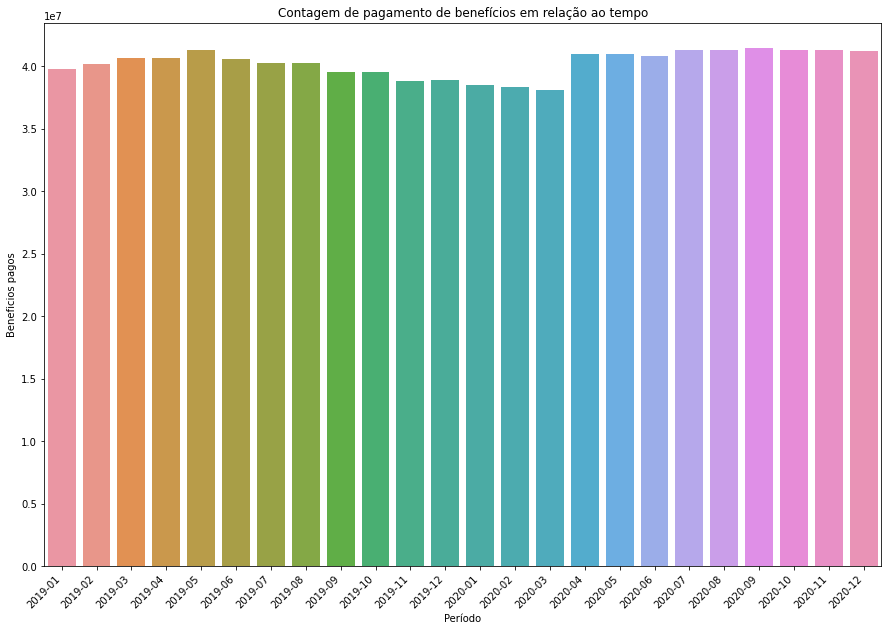

In [25]:
fig, ax = plt.subplots(figsize = (15,10))   
df_total_beneficos = beneficios_normalizado.groupby(by='data_referencia').sum().reset_index()
fig = sns.barplot(data=df_total_beneficos, x=df_total_beneficos['data_referencia'], y=df_total_beneficos['total_de_beneficios'], ax=ax)
x_dates = df_total_beneficos['data_referencia'].dt.strftime('%Y-%m').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
fig.set(title='Contagem de pagamento de benefícios em relação ao tempo', xlabel='Período', ylabel='Beneficios pagos')

### Análise por região

#### As concessões do benefício tiveram diferença de comportamento por região?

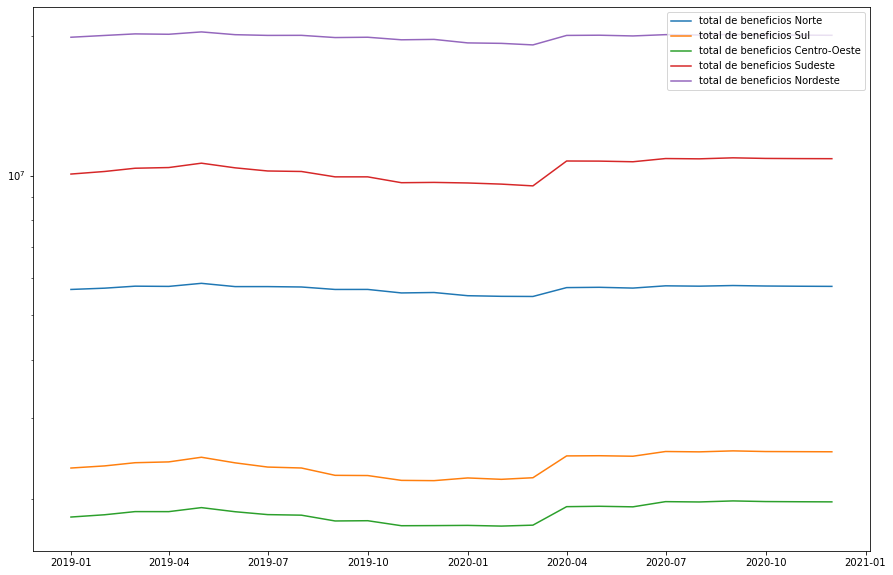

In [26]:
cosolidacao_no = beneficios_normalizado_norte.groupby(by='data_referencia').sum().reset_index()
cosolidacao_s = beneficios_normalizado_sul.groupby(by='data_referencia').sum().reset_index()
cosolidacao_co = beneficios_normalizado_centro_oeste.groupby(by='data_referencia').sum().reset_index()
cosolidacao_se = beneficios_normalizado_sudeste.groupby(by='data_referencia').sum().reset_index()
cosolidacao_ne = beneficios_normalizado_nordeste.groupby(by='data_referencia').sum().reset_index()

plt.figure(figsize=(15, 10))
plt.figure.fmt_xdata = mdates.DateFormatter('%Y-%m')
plt.plot(cosolidacao_no['data_referencia'], cosolidacao_no['total_de_beneficios'], label='total de beneficios Norte')
plt.plot(cosolidacao_s['data_referencia'], cosolidacao_s['total_de_beneficios'], label='total de beneficios Sul')
plt.plot(cosolidacao_co['data_referencia'], cosolidacao_co['total_de_beneficios'], label='total de beneficios Centro-Oeste')
plt.plot(cosolidacao_se['data_referencia'], cosolidacao_se['total_de_beneficios'], label='total de beneficios Sudeste')
plt.plot(cosolidacao_ne['data_referencia'], cosolidacao_ne['total_de_beneficios'], label='total de beneficios Nordeste')
plt.legend(loc='upper right')
plt.yscale('log')
plt.show()

#### **Segundo os dados governamentais disponibilizados no site do [Ministério da Saúde](https://covid.saude.gov.br/) as regiões mais afetadas pela pandemia, que concentram o maior número Incidência/100mil hab., são a região Sul e Centro-Oeste. Estas regiões tiveram um maior aumento de beneficiados do que regiões menos afetadas?**
De acordo com os gráficos plotados a cima é possível perceber que o aumento dos benefiários não foi maior nas regiões Centro-Oeste e Sul.

#### **Em qual região o Benefício para Superação da Extrema Pobreza teve um aumento mais significativo?**

É possivel verificar conforme os gráficos abaixo por região que o aumento mais significativo do benefício de extrema pobreza foi na região Sudeste.

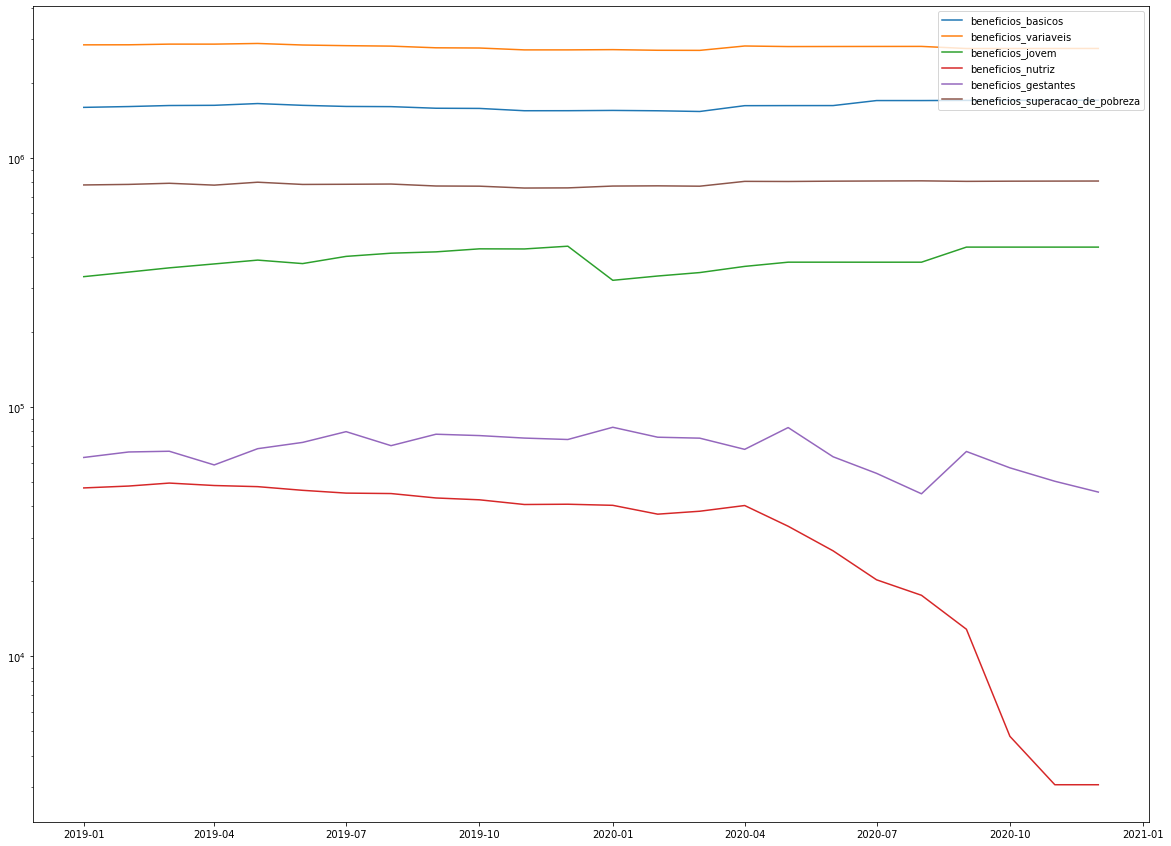

In [27]:
#Analisando beneficios em razão do tempo NO

plt.figure(figsize=(20, 15))
plt.figure.fmt_xdata = mdates.DateFormatter('%Y-%m')
plt.plot(cosolidacao_no['data_referencia'], cosolidacao_no['beneficios_basicos'], label='beneficios_basicos')
plt.plot(cosolidacao_no['data_referencia'], cosolidacao_no['beneficios_variaveis'], label='beneficios_variaveis')
plt.plot(cosolidacao_no['data_referencia'], cosolidacao_no['beneficios_jovem'], label='beneficios_jovem')
plt.plot(cosolidacao_no['data_referencia'], cosolidacao_no['beneficios_nutriz'], label='beneficios_nutriz')
plt.plot(cosolidacao_no['data_referencia'], cosolidacao_no['beneficios_gestantes'], label='beneficios_gestantes')
plt.plot(cosolidacao_no['data_referencia'], cosolidacao_no['beneficios_superacao_de_pobreza'], label='beneficios_superacao_de_pobreza')
plt.legend(loc='upper right')
plt.yscale('log')
plt.show()

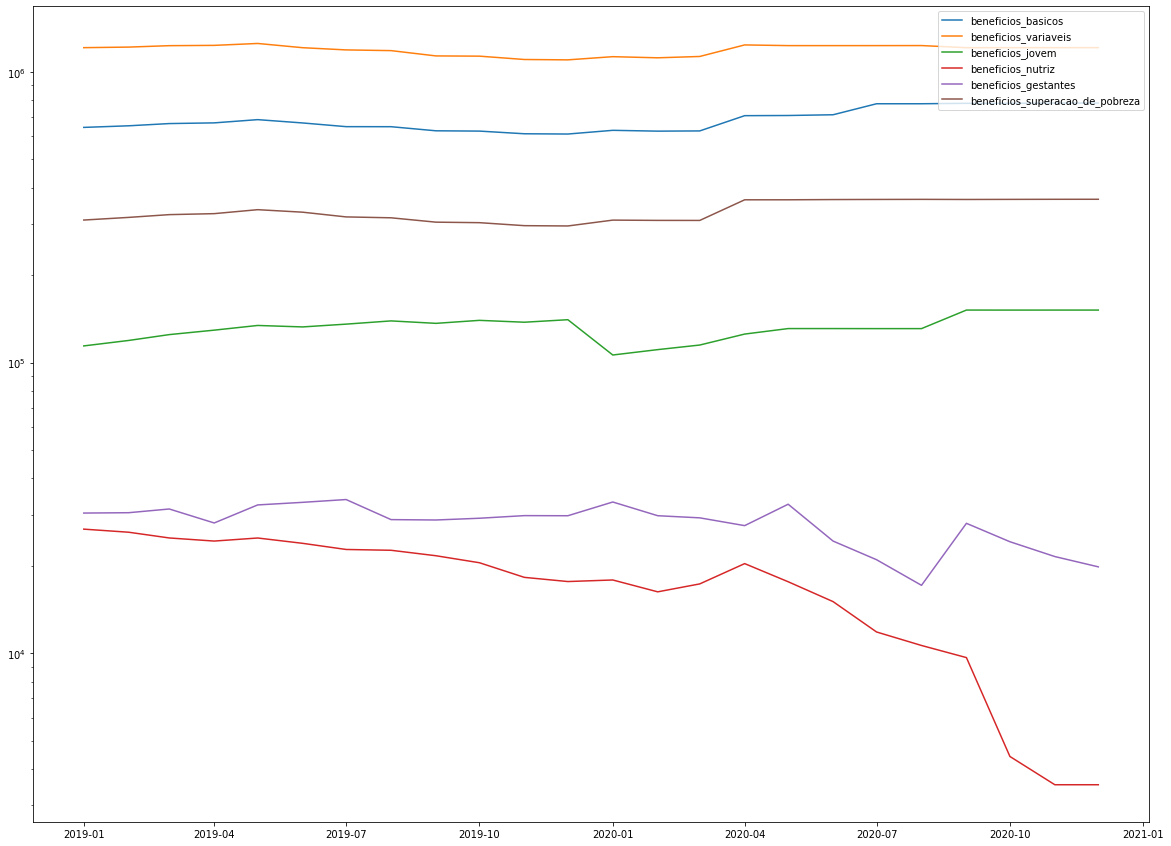

In [62]:
#Analisando beneficios em razão do tempo S

plt.figure(figsize=(20, 15))
plt.figure.fmt_xdata = mdates.DateFormatter('%Y-%m')
plt.plot(cosolidacao_s['data_referencia'], cosolidacao_s['beneficios_basicos'], label='beneficios_basicos')
plt.plot(cosolidacao_s['data_referencia'], cosolidacao_s['beneficios_variaveis'], label='beneficios_variaveis')
plt.plot(cosolidacao_s['data_referencia'], cosolidacao_s['beneficios_jovem'], label='beneficios_jovem')
plt.plot(cosolidacao_s['data_referencia'], cosolidacao_s['beneficios_nutriz'], label='beneficios_nutriz')
plt.plot(cosolidacao_s['data_referencia'], cosolidacao_s['beneficios_gestantes'], label='beneficios_gestantes')
plt.plot(cosolidacao_s['data_referencia'], cosolidacao_s['beneficios_superacao_de_pobreza'], label='beneficios_superacao_de_pobreza')
plt.legend(loc='upper right')
plt.yscale('log')
plt.show()

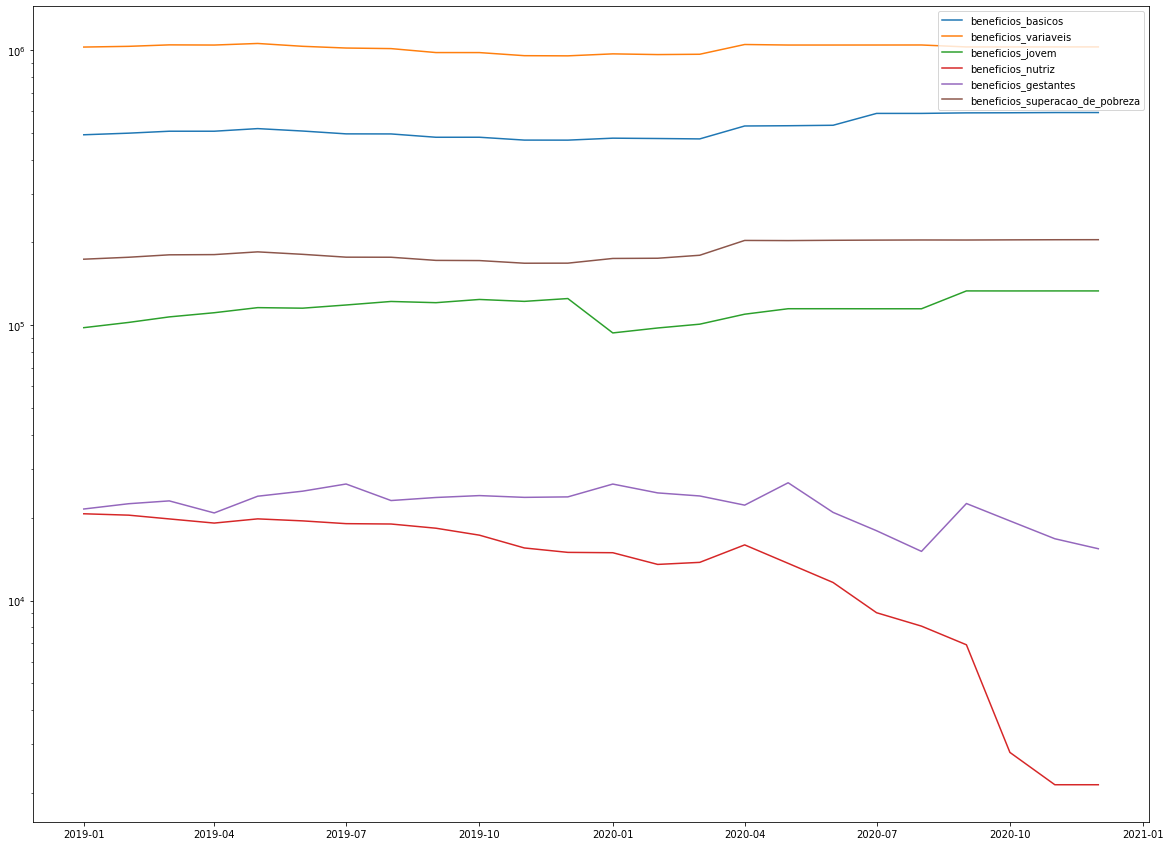

In [61]:
#Analisando beneficios em razão do tempo CO

plt.figure(figsize=(20, 15))
plt.figure.fmt_xdata = mdates.DateFormatter('%Y-%m')
plt.plot(cosolidacao_co['data_referencia'], cosolidacao_co['beneficios_basicos'], label='beneficios_basicos')
plt.plot(cosolidacao_co['data_referencia'], cosolidacao_co['beneficios_variaveis'], label='beneficios_variaveis')
plt.plot(cosolidacao_co['data_referencia'], cosolidacao_co['beneficios_jovem'], label='beneficios_jovem')
plt.plot(cosolidacao_co['data_referencia'], cosolidacao_co['beneficios_nutriz'], label='beneficios_nutriz')
plt.plot(cosolidacao_co['data_referencia'], cosolidacao_co['beneficios_gestantes'], label='beneficios_gestantes')
plt.plot(cosolidacao_co['data_referencia'], cosolidacao_co['beneficios_superacao_de_pobreza'], label='beneficios_superacao_de_pobreza')
plt.legend(loc='upper right')
plt.yscale('log')
plt.show()

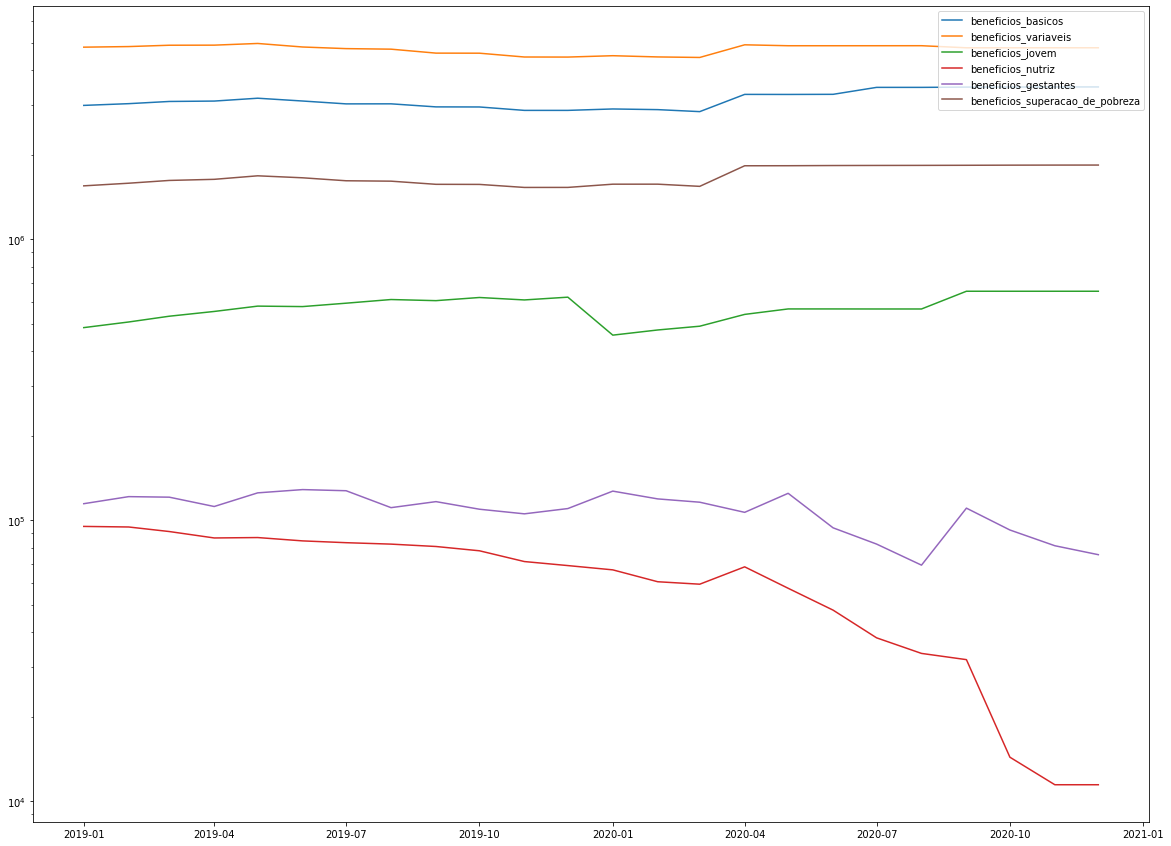

In [30]:
#Analisando beneficios em razão do tempo SE

plt.figure(figsize=(20, 15))
plt.figure.fmt_xdata = mdates.DateFormatter('%Y-%m')
plt.plot(cosolidacao_se['data_referencia'], cosolidacao_se['beneficios_basicos'], label='beneficios_basicos')
plt.plot(cosolidacao_se['data_referencia'], cosolidacao_se['beneficios_variaveis'], label='beneficios_variaveis')
plt.plot(cosolidacao_se['data_referencia'], cosolidacao_se['beneficios_jovem'], label='beneficios_jovem')
plt.plot(cosolidacao_se['data_referencia'], cosolidacao_se['beneficios_nutriz'], label='beneficios_nutriz')
plt.plot(cosolidacao_se['data_referencia'], cosolidacao_se['beneficios_gestantes'], label='beneficios_gestantes')
plt.plot(cosolidacao_se['data_referencia'], cosolidacao_se['beneficios_superacao_de_pobreza'], label='beneficios_superacao_de_pobreza')
plt.legend(loc='upper right')
plt.yscale('log')
plt.show()

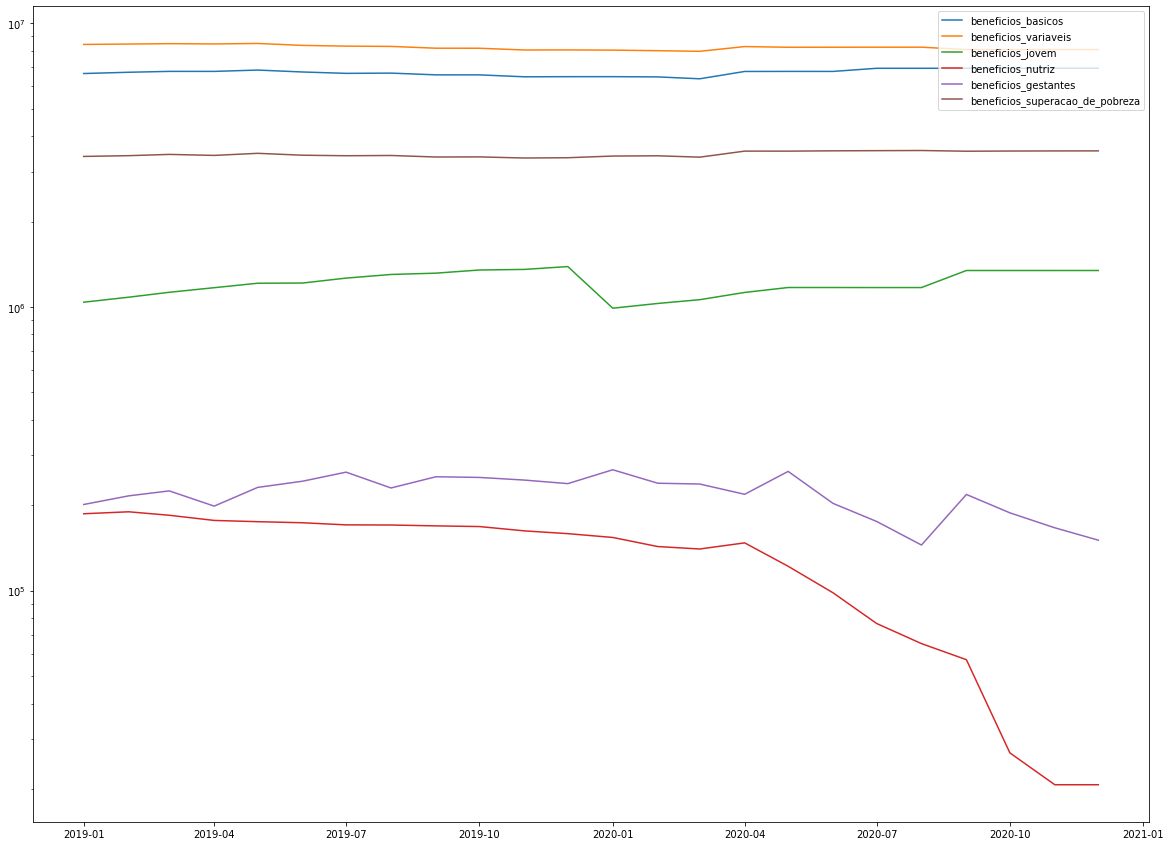

In [31]:
#Analisando beneficios em razão do tempo NE

plt.figure(figsize=(20, 15))
plt.figure.fmt_xdata = mdates.DateFormatter('%Y-%m')
plt.plot(cosolidacao_ne['data_referencia'], cosolidacao_ne['beneficios_basicos'], label='beneficios_basicos')
plt.plot(cosolidacao_ne['data_referencia'], cosolidacao_ne['beneficios_variaveis'], label='beneficios_variaveis')
plt.plot(cosolidacao_ne['data_referencia'], cosolidacao_ne['beneficios_jovem'], label='beneficios_jovem')
plt.plot(cosolidacao_ne['data_referencia'], cosolidacao_ne['beneficios_nutriz'], label='beneficios_nutriz')
plt.plot(cosolidacao_ne['data_referencia'], cosolidacao_ne['beneficios_gestantes'], label='beneficios_gestantes')
plt.plot(cosolidacao_ne['data_referencia'], cosolidacao_ne['beneficios_superacao_de_pobreza'], label='beneficios_superacao_de_pobreza')
plt.legend(loc='upper right')
plt.yscale('log')
plt.show()

#### **Em qual período da pandemia houve o maior aumento de concessão de benefícios?**
O período com maior aumento de concessões de benefício foi a partir de 03/2020 e 07/2020

##Durante a pandemia qual estado recebeu mais benefícios do bolsa familia?

[Text(0, 0.5, 'Estados'),
 Text(0.5, 0, 'Número total de beneficios'),
 Text(0.5, 1.0, 'Benefícios pagos em 2020')]

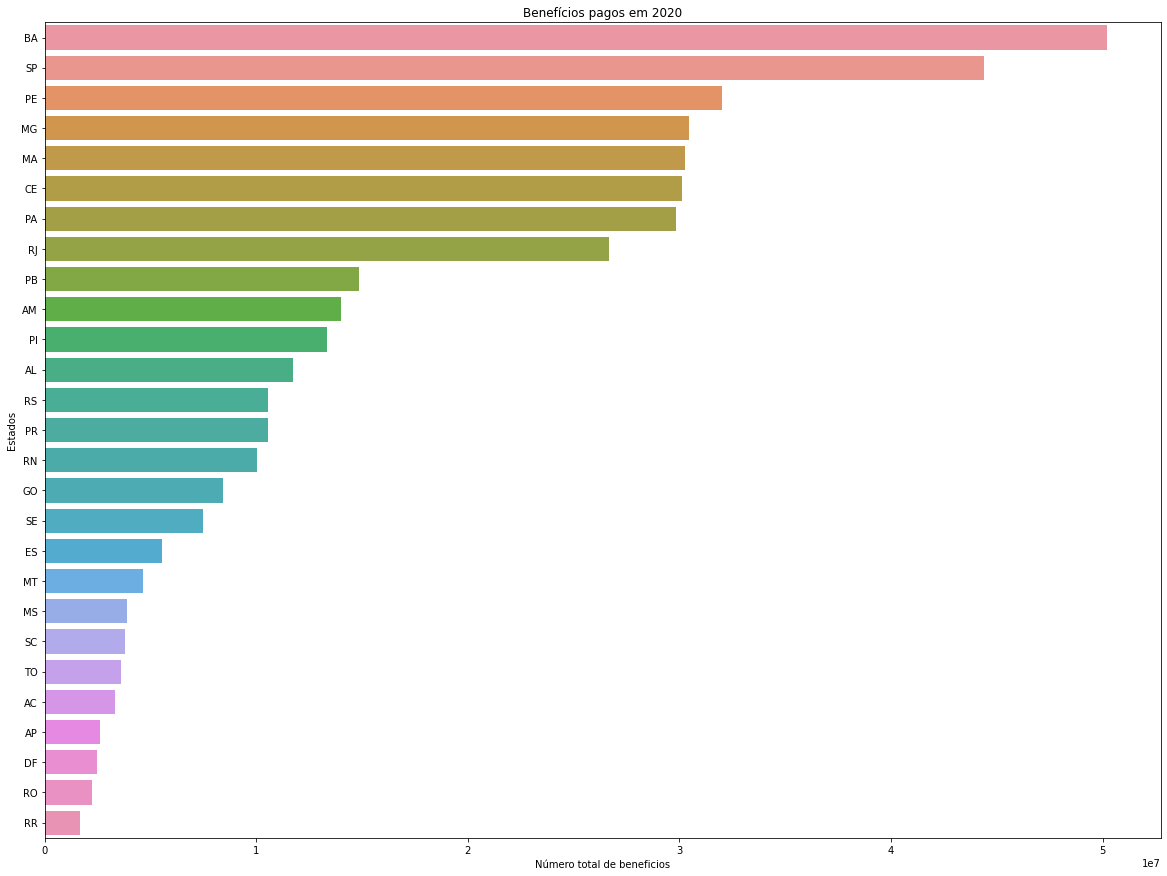

In [32]:
data_inicial = '2020-2-29'
data_final = '2020-12-31'

#filtrando beneficios
depois_do_inicio = beneficios_normalizado['data_referencia'] >= data_inicial
antes_do_final = beneficios_normalizado['data_referencia'] <= data_final
filtro_de_datas = depois_do_inicio & antes_do_final
beneficios_normalizado_filtrado = beneficios_normalizado[filtro_de_datas]
beneficios_normalizado_filtrado.reset_index(drop=True)
beneficios_por_estado = beneficios_normalizado_filtrado.groupby(by='sigla_estado').sum().reset_index()
beneficios_por_estado = beneficios_por_estado.sort_values(['total_de_beneficios'], ascending=False).reset_index()

plt.figure(figsize=(20, 15))
beneficios_por_estado_bar_plot = sns.barplot(data=beneficios_por_estado, y=beneficios_por_estado['sigla_estado'], x=beneficios_por_estado['total_de_beneficios'])

beneficios_por_estado_bar_plot.set(ylabel="Estados", xlabel="Número total de beneficios", title="Benefícios pagos em 2020")


## Antes da pandemia qual estado recebeu mais benefícios do bolsa familia?

[Text(0, 0.5, 'Estados'),
 Text(0.5, 0, 'Número total de beneficios'),
 Text(0.5, 1.0, 'Benefícios pagos em 2019')]

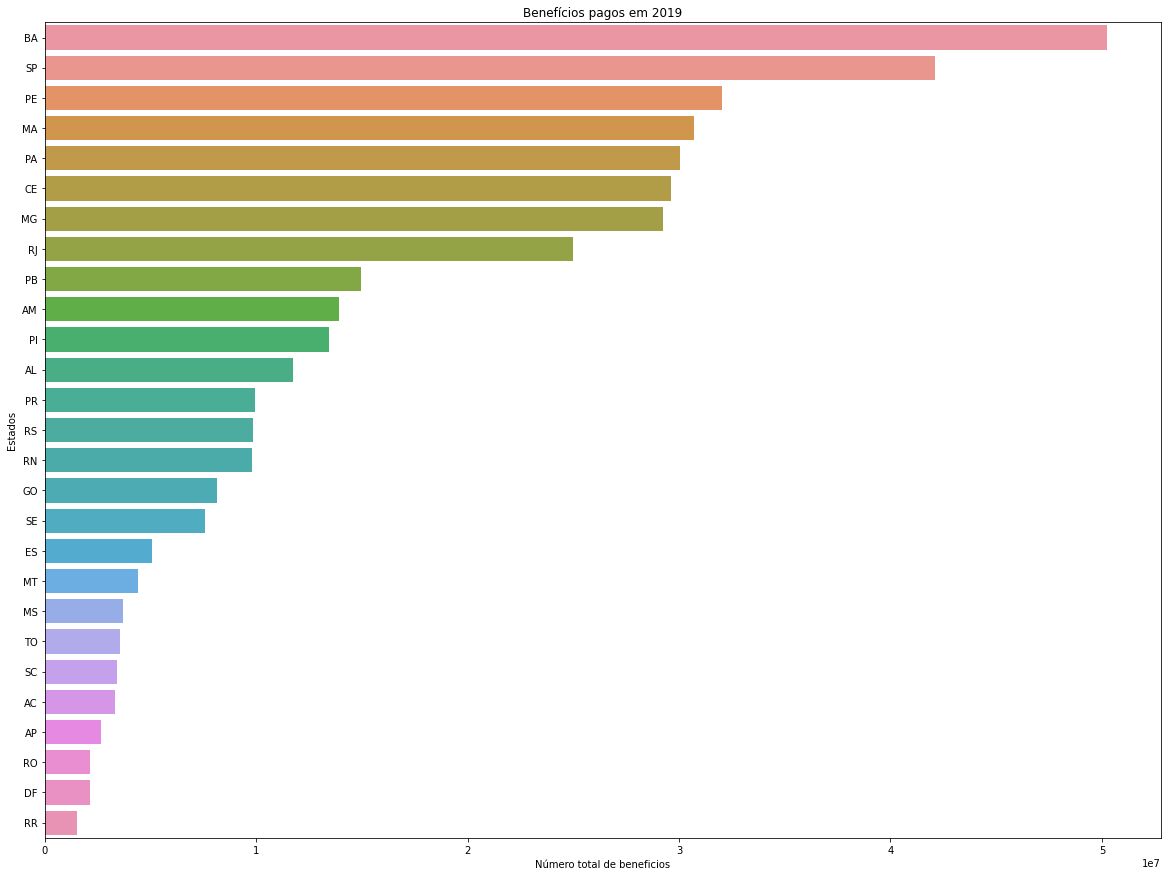

In [33]:
data_inicial = '2019-2-28'
data_final = '2019-12-31'

#filtrando beneficios
depois_do_inicio = beneficios_normalizado['data_referencia'] >= data_inicial
antes_do_final = beneficios_normalizado['data_referencia'] <= data_final
filtro_de_datas = depois_do_inicio & antes_do_final
beneficios_normalizado_filtrado = beneficios_normalizado[filtro_de_datas]
beneficios_normalizado_filtrado.reset_index(drop=True)
beneficios_por_estado = beneficios_normalizado_filtrado.groupby(by='sigla_estado').sum().reset_index()
beneficios_por_estado = beneficios_por_estado.sort_values(['total_de_beneficios'], ascending=False).reset_index()

plt.figure(figsize=(20, 15))
beneficios_por_estado_bar_plot = sns.barplot(data=beneficios_por_estado, y=beneficios_por_estado['sigla_estado'], x=beneficios_por_estado['total_de_beneficios'])

beneficios_por_estado_bar_plot.set(ylabel="Estados", xlabel="Número total de beneficios", title="Benefícios pagos em 2019")

# Explorando dados do covid

### A evolução da covid no brasil e por regiões

[Text(0.5, 1.0, 'Evolução da covid no nordeste')]

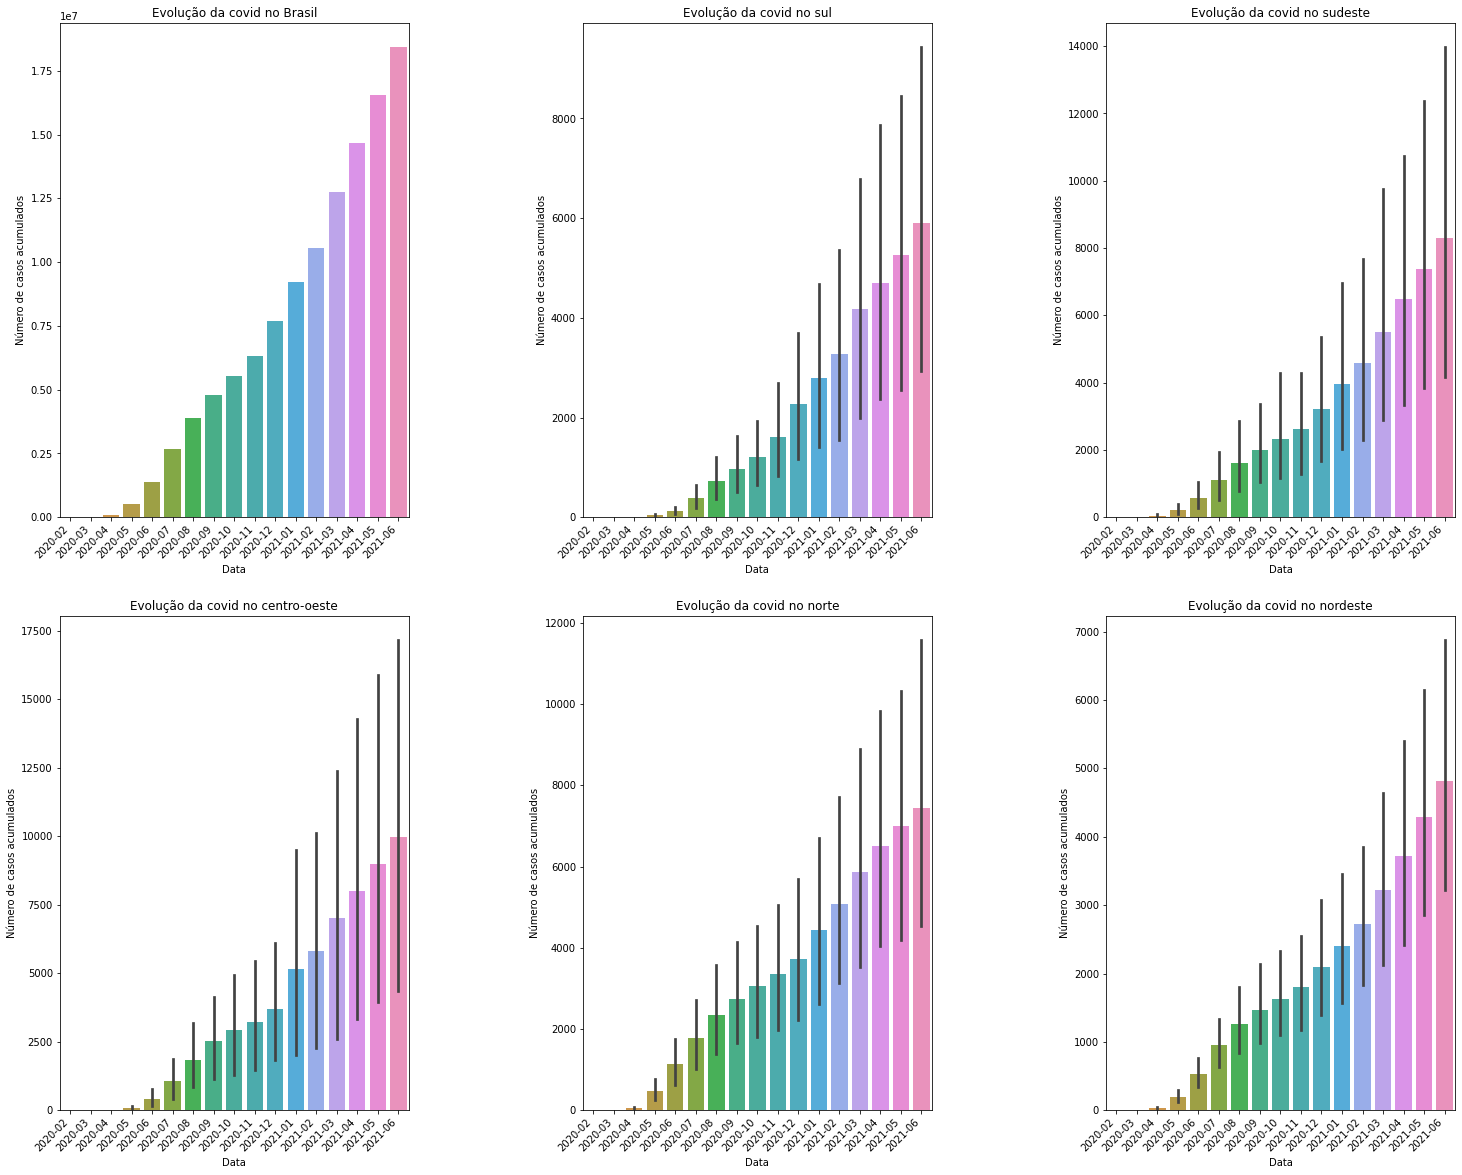

In [34]:
#filtrando por data
filter = dados_covid_brasil.groupby(by=pd.Grouper(key='data', freq='M'))
filter_s = dados_covid_sul.groupby(by=pd.Grouper(key='data', freq='M'))
filter_se = dados_covid_sudeste.groupby(by=pd.Grouper(key='data', freq='M'))
filter_ne = dados_covid_nordeste.groupby(by=pd.Grouper(key='data', freq='M'))
filter_n = dados_covid_norte.groupby(by=pd.Grouper(key='data', freq='M'))
filter_co = dados_covid_cento_oeste.groupby(by=pd.Grouper(key='data', freq='M'))

filtro_sul = filter_s['data'].transform('max').sort_index() == dados_covid_sul['data']
filtro_sudeste = filter_se['data'].transform('max').sort_index() == dados_covid_sudeste['data']
filtro_centro_oeste = filter_co['data'].transform('max').sort_index() == dados_covid_cento_oeste['data']
filtro_norte = filter_n['data'].transform('max').sort_index() == dados_covid_norte['data']
filtro_nordeste = filter_ne['data'].transform('max').sort_index() == dados_covid_nordeste['data']

#pegando apenas o último dia do mês, pois os dados são acumulados
dados_covid_brasil_mes = dados_covid_brasil[filter['data'].transform('max') == dados_covid_brasil['data']]
dados_covid_sul_mes = dados_covid_sul[filtro_sul]
dados_covid_sudeste_mes = dados_covid_sudeste[filtro_sudeste]
dados_covid_centro_oeste_mes = dados_covid_cento_oeste[filtro_centro_oeste]
dados_covid_norte_mes = dados_covid_norte[filtro_norte]
dados_covid_nordeste_mes = dados_covid_nordeste[filtro_nordeste]

#definindo as labels do eixo x
x_dates_brasil = dados_covid_brasil_mes['data'].dt.strftime('%Y-%m').sort_values().unique()
x_dates_sul = dados_covid_sul_mes['data'].dt.strftime('%Y-%m').sort_values().unique()
x_dates_sudeste = dados_covid_sudeste_mes['data'].dt.strftime('%Y-%m').sort_values().unique()
x_dates_centro_oeste = dados_covid_centro_oeste_mes['data'].dt.strftime('%Y-%m').sort_values().unique()
x_dates_norte = dados_covid_norte_mes['data'].dt.strftime('%Y-%m').sort_values().unique()
x_dates_nordeste = dados_covid_norte_mes['data'].dt.strftime('%Y-%m').sort_values().unique()

#plotando a evolução dos casos de covid no brasil, por mes
fig, ax = plt.subplots(figsize = (25,20), ncols=3,nrows=2)   
plt.subplots_adjust(hspace = 0.2, wspace=0.5)
#definindo os plots
brasil_bar_plot = sns.barplot(data=dados_covid_brasil_mes, x=dados_covid_brasil_mes['data'], y=dados_covid_brasil_mes['casosAcumulado'], ax=ax[0][0])
sul_bar_plot = sns.barplot(data=dados_covid_sul_mes, x=dados_covid_sul_mes['data'], y=dados_covid_sul_mes['casosAcumulado'], ax=ax[0][1])
sudeste_bar_plot = sns.barplot(data=dados_covid_sudeste_mes, x=dados_covid_sudeste_mes['data'], y=dados_covid_sudeste_mes['casosAcumulado'], ax=ax[0][2])
centro_oeste_bar_plot = sns.barplot(data=dados_covid_centro_oeste_mes, x=dados_covid_centro_oeste_mes['data'], y=dados_covid_centro_oeste_mes['casosAcumulado'], ax=ax[1][0])
norte_bar_plot = sns.barplot(data=dados_covid_norte_mes, x=dados_covid_norte_mes['data'], y=dados_covid_norte_mes['casosAcumulado'], ax=ax[1][1])
nordeste_bar_plot = sns.barplot(data=dados_covid_nordeste_mes, x=dados_covid_nordeste_mes['data'], y=dados_covid_nordeste_mes['casosAcumulado'], ax=ax[1][2])


#aplicando rotação as datas
brasil_bar_plot.set_xticklabels(brasil_bar_plot.get_xticklabels(), rotation=45)
sul_bar_plot.set_xticklabels(sul_bar_plot.get_xticklabels(), rotation=45)
sudeste_bar_plot.set_xticklabels(sudeste_bar_plot.get_xticklabels(), rotation=45)
centro_oeste_bar_plot.set_xticklabels(centro_oeste_bar_plot.get_xticklabels(), rotation=45)
norte_bar_plot.set_xticklabels(norte_bar_plot.get_xticklabels(), rotation=45)
nordeste_bar_plot.set_xticklabels(nordeste_bar_plot.get_xticklabels(), rotation=45)

ax[0][0].set_xticklabels(labels=x_dates_brasil, rotation=45, ha='right')
ax[0][1].set_xticklabels(labels=x_dates_brasil, rotation=45, ha='right')
ax[0][2].set_xticklabels(labels=x_dates_brasil, rotation=45, ha='right')
ax[1][0].set_xticklabels(labels=x_dates_brasil, rotation=45, ha='right')
ax[1][1].set_xticklabels(labels=x_dates_brasil, rotation=45, ha='right')
ax[1][2].set_xticklabels(labels=x_dates_brasil, rotation=45, ha='right')

ax[0][0].set(xlabel='Data', ylabel='Número de casos acumulados')
ax[0][1].set(xlabel='Data', ylabel='Número de casos acumulados')
ax[0][2].set(xlabel='Data', ylabel='Número de casos acumulados')
ax[1][0].set(xlabel='Data', ylabel='Número de casos acumulados')
ax[1][1].set(xlabel='Data', ylabel='Número de casos acumulados')
ax[1][2].set(xlabel='Data', ylabel='Número de casos acumulados')

#aplicando titulo aos plots
brasil_bar_plot.set(title="Evolução da covid no Brasil")
sul_bar_plot.set(title="Evolução da covid no sul")
sudeste_bar_plot.set(title="Evolução da covid no sudeste")
centro_oeste_bar_plot.set(title="Evolução da covid no centro-oeste")
norte_bar_plot.set(title="Evolução da covid no norte")
nordeste_bar_plot.set(title="Evolução da covid no nordeste")

# Analisando a relação entre pandemia e benefícios do bolsa família

#### Somando valores dos benefícios por data 

In [35]:
beneficios_sum = beneficios_normalizado.groupby(pd.Grouper(key='data_referencia', freq='M', axis=0)).sum().reset_index()

### Agregando dados dos benefícios e pandemia

In [36]:
covid_dados = dados_covid_brasil_mes[['data', 'casosAcumulado']]
covid_dados.columns = ['data_referencia','casos_acumulado']
covid_dados = covid_dados.reset_index(drop=True)

data_inicial = '2020-2-29'
data_final = '2020-12-31'

#filtrando beneficios
depois_do_inicio = beneficios_sum['data_referencia'] >= data_inicial
antes_do_final = beneficios_sum['data_referencia'] <= data_final
filtro_de_datas = depois_do_inicio & antes_do_final
beneficios_filtrados = beneficios_sum[filtro_de_datas]
beneficios_filtrados.reset_index(drop=True)

#filtrando dados do covid
depois_do_inicio = covid_dados['data_referencia'] >= data_inicial
antes_do_final = covid_dados['data_referencia'] <= data_final
filtro_de_datas = depois_do_inicio & antes_do_final
covid_dados_filtrado = covid_dados[filtro_de_datas]

# construindo o dataframe unindo o total de benefícios e o total de casos de covid
beneficios_covid = beneficios_filtrados[['data_referencia', 'total_de_beneficios']]
casos_covid = covid_dados_filtrado['casos_acumulado']
beneficios_covid = beneficios_covid.assign(total_casos_covid=casos_covid.values.astype(int))

## Correlação entre total de benefícios e total de casos de covid

### Qual a correlação entre o total de benefícios concedidos e total de casos de covid no Brasil?

A correlação entre os benefícios concedidos e o total de casos de covid é de 0.60

In [37]:
corr_df = beneficios_covid[['total_de_beneficios', 'total_casos_covid']]
correlacao_beneficios_casos = beneficios_covid['total_de_beneficios'].corr(beneficios_covid['total_casos_covid'])
print(f"A correlação entre os benefícios concedidos e o total de casos de covid é de {correlacao_beneficios_casos} é perceptível que existe uma correlação moderada")

A correlação entre os benefícios concedidos e o total de casos de covid é de 0.6065463513659479 é perceptível que existe uma correlação moderada


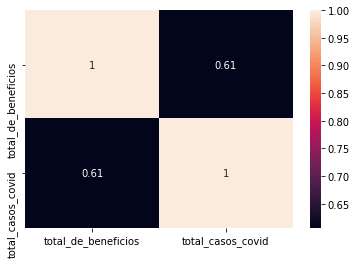

In [38]:
sns.heatmap(corr_df.corr(), annot=True)

[Text(0, 0.5, 'Total de benefícios pagos'),
 Text(0.5, 0, 'Total de casos de acumulados de COVID')]

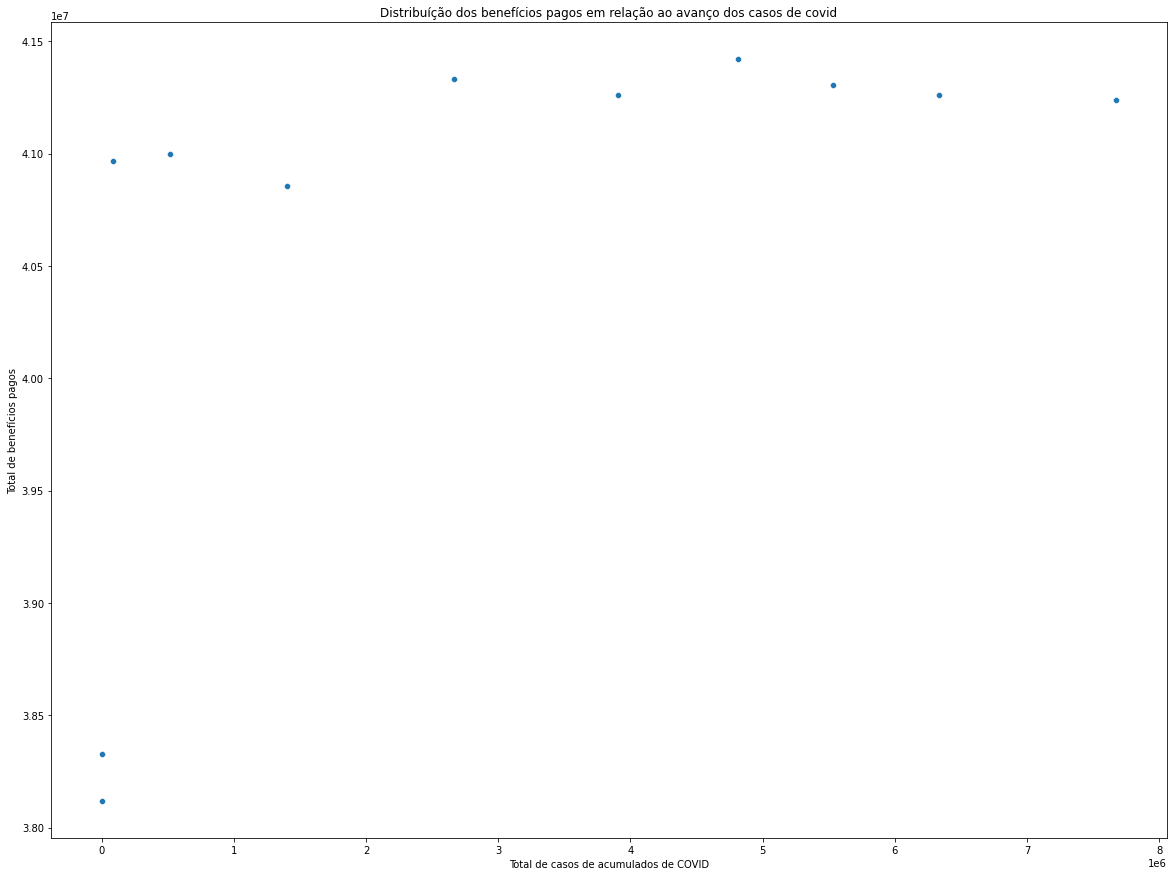

In [39]:
plt.figure(figsize=(20, 15))
scater_covid_beneficios = sns.scatterplot(data=beneficios_covid, x=beneficios_covid['total_casos_covid'], y=beneficios_covid['total_de_beneficios'], legend=True)
plt.title('Distribuíção dos benefícios pagos em relação ao avanço dos casos de covid')
scater_covid_beneficios.set( ylabel= 'Total de benefícios pagos', xlabel = 'Total de casos de acumulados de COVID')

[Text(0, 0.5, 'Total de benefícios pagos'),
 Text(0.5, 0, 'Total de casos de acumulados de COVID')]

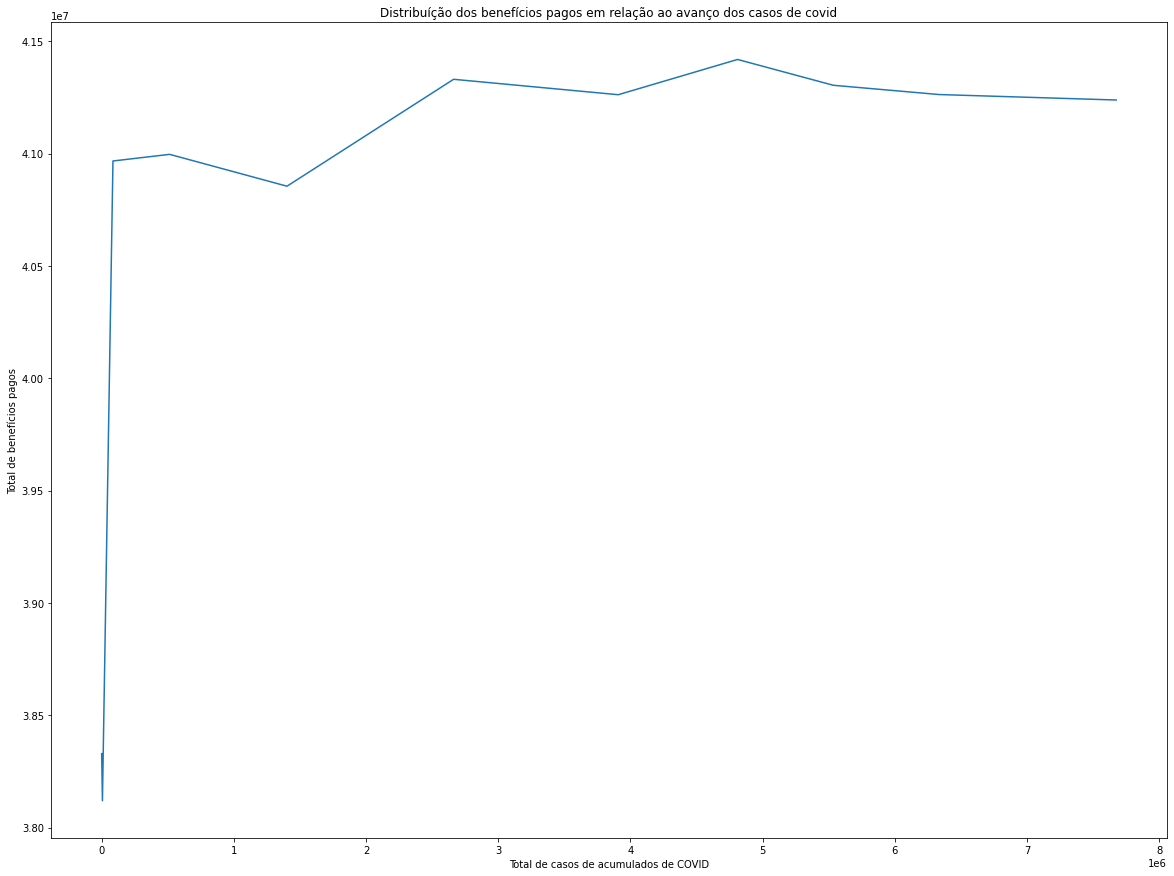

In [40]:
plt.figure(figsize=(20, 15))
line_plot_beneficios_covid = sns.lineplot(data=beneficios_covid, x=beneficios_covid['total_casos_covid'], y=beneficios_covid['total_de_beneficios'])
plt.title('Distribuíção dos benefícios pagos em relação ao avanço dos casos de covid')
line_plot_beneficios_covid.set( ylabel= 'Total de benefícios pagos', xlabel = 'Total de casos de acumulados de COVID')

<Figure size 1440x1080 with 0 Axes>

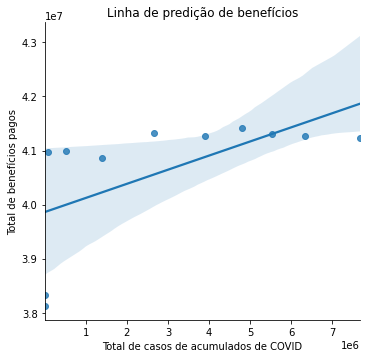

In [41]:
plt.figure(figsize=(20, 15))
casos_modelo = beneficios_covid[['total_casos_covid', 'total_de_beneficios']]
lm_plot = sns.lmplot(data=casos_modelo, x='total_casos_covid', y='total_de_beneficios')
plt.title('Linha de predição de benefícios')
lm_plot.set( ylabel= 'Total de benefícios pagos', xlabel = 'Total de casos de acumulados de COVID')

# Modelo de predição dos benefícios 

## Ferramentas necessárias para o desenvolvimento do modelo

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

### Definindo a variável independente

In [43]:
X = casos_modelo[['total_casos_covid']]

### Definindo os valores da variável dependente

In [44]:
y = casos_modelo['total_de_beneficios']

### definindo os parâmetros do regressor

In [45]:
test_size = 0.2
seed = 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [46]:
X.shape, y.shape

((11, 1), (11,))

In [47]:
X_train.shape, y_train.shape

((8, 1), (8,))

In [48]:
regressor = LinearRegression()

In [49]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
regressor.intercept_

39390066.405505456

In [51]:
regressor.coef_

array([0.35347429])

In [52]:
regressor.score(X_train, y_train)

0.5067735778011686

### Executando a regressão

In [53]:
y_pred = regressor.predict(X_test)
y_pred

array([39885651.85836801, 41629636.40945817, 39420246.04074109])

#### Exibindo os resultados da regressão

In [54]:
resultados = pd.DataFrame ({
    'Casos de covid': X_test['total_casos_covid'],
    'Beneficios concedidos': y_test,
    'Beneficios preditos': y_pred,
    'Erro (resíduo)': y_test - y_pred,
    'Erro Absoluto': abs(y_test - y_pred)
})

In [63]:
resultados

,Casos de covid,Beneficios concedidos,Beneficios preditos,Erro (resíduo),Erro Absoluto
17,1402041,40854556,3.988565e+07,9.689041e+05,9.689041e+05
22,6335878,41262493,4.162964e+07,-3.671434e+05,3.671434e+05
15,85380,40966748,3.942025e+07,1.546502e+06,1.546502e+06


### Verificando os erros

In [56]:
MAE = mean_absolute_error(y_test, y_pred)
MAE

960849.8367830217

In [57]:
MSE = mean_squared_error(y_test, y_pred)
MSE

1155079276257.2764

In [58]:
RMSE = mean_squared_error(y_test, y_pred, squared=False)
RMSE

1074746.1450302002